---
layout: default
title: "Deep Learning"
categories: deeplearning
permalink: /ML24/
order: 24
comments: true
---

In [9]:
%pylab --no-import-all inline
import pandas as pd
from copy import deepcopy as cp
from plot_ann import ann
from mpl_flow import Flow

Populating the interactive namespace from numpy and matplotlib


# Deep learning
While the concept of deep learning has been around since many years, it really took off some years ago. On one hand, from the advent of computers and internet we ha started to accumulate an enormous amount of data. On the other hand computational power has increased to the point that training very large neural network is now not only possible, but relatively easy. These two fact combined are the reason behind the popularization of deep learning algorithm, since large amount of data (more precisely labeled data) fed into very large neural networks, produce results unachievable by other models.

So in one word **scale** has been driving deep learning, scale of labeled data, of computational power and of the algorithm.

Incidentally many new technologies (i.e. types of neural networks) have been invented while trying to run large algorithms faster: for example, one of the fundamental breakthrough in ML has been switching from a sigmoid function to a RELU function (<a href="#fig:sigmoidrelu">figure below</a>). This is due to the fact that in the regions far from $0$, the parameters change very slowly, while with the ReLU the gradient descent is much more efficient.

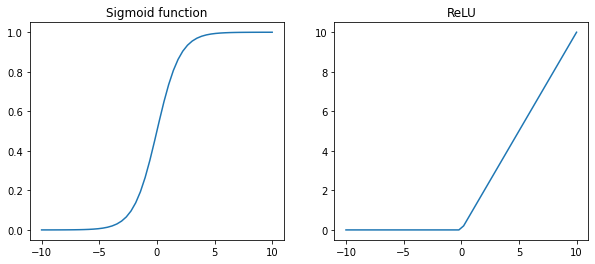

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes

x = np.linspace(-10, 10)
ax1.plot(x, 1/(1 + np.exp(-x)))
ax1.set_title('Sigmoid function')
ax2.plot(x, np.maximum(x, 0))
ax2.set_title('ReLU');

<i id="fig:sigmoidrelu">Comparison between sigmoid function and ReLU</i>

## Deep representation
Why do deep neural networks work well? Deep neural networks build a hierarchical representation of training data.

Early layers of neural networks detect simpler functions and compose them together in following layers of the neural network in more complex functions (a possible example in <a href="#fig:audioexample">the figure below</a>).

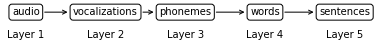

In [40]:
labels = ['audio', 'vocalizations', 'phonemes', 'words', 'sentences']
fig, ax = plt.subplots(figsize=(6, .5))
f = Flow()
nodes = [f.node(l) for l in labels]
[f.node('Layer {}'.format(i), travel='s', startpoint=n, bbox=dict(edgecolor='w'), connect=False) for i, n in enumerate(nodes, 1)];

<i id="fig:audioexample">An hypothesized example of increasingly complex features learned from a 5 layers-deep neural network trained on audio sources.</i>

A result from circuit theory states that:

    there are functions you can compute with a "small" L-layer deep neural network that shallower networks require exponentially more hidden units to compute.
    
Let's try to illustrate this with an example: as we have seen in <a href="page:ML11">ML-11</a> we can calculate logical functions with neural networks. Let's say we want to calculate the combined $\text{XOR}$ of our input vector $x$.

$$y=x_1 \text{XOR} x_2 \text{XOR} x_3 \text{XOR} \dots \text{XOR} x_n$$

To compute $y$ the depth of the neural network should be on the order of $O(\log n)$. However if we are forced to compute this function with just 1 hidden layer than in order to compute $y$ we will need $\sim 2^n$ hidden units.

## Notation
Let's take the deep neural network in <a href=#fig:deepann>the figure below</a>

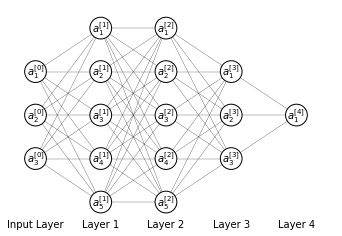

In [41]:
ax, *_ = ann([3, 5, 5, 3, 1], width=1.5, radius=2, node_labels=True, layer_labels=True)
ax.set_aspect('equal')

<i id="fig:deepann">A 4-layers deep neural network</i>

We say that this neural network as $L=4$ layers; input layer is included in the number of layers. Each layer has $n^{[l]}$ number of units. In this case:

$$
\begin{aligned}
& n^{[1]}=5 \qquad n^{[2]}=5 \qquad n^{[3]}=3 \qquad n^{[4]}=n^{[L]}=1 \qquad \\
& n^{[0]} = n_x=3
\end{aligned}
$$

The activations in each layer are referred to as $a^{[l]}$ and are computed as:

$$
a^{[l]} = g^{[l]}\left(z^{[l]}\right)
$$

where $z^{[l]}$ is calculated from parameters $W^{[l]}$ and bias $b^{[l]}$.

The input layer is referred to as $x = a^{[0]}$ and the output layer as $a^{[L]} = \hat{y}$

## Forward propagation
Forward propagation for a deep neural network follows the same process as for a shallow network, which is explained in detail in <a href="page:ML10">ML-10</a>. The process follows the general rule:

$$
\begin{aligned}
& Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]} \\
& A^{[l]}=g^{[l]}(Z^{[l]})
\end{aligned}
$$

### Matrix dimensions
#### For a single example
Matrices mentioned in forward propagation have the following dimensions for a single training example:

$$
\begin{aligned}
z^{[l]} & \in \mathbb{R}^{(n^{[l]}, 1)} \\
W^{[l]} & \in \mathbb{R}^{(n^{[l]}, n^{[l-1]})} \\
a^{[l-1]} & \in \mathbb{R}^{(n^{[l-1]}, 1)} \\
b^{[l]} & \in \mathbb{R}^{(n^{[l]}, 1)}
\end{aligned}
$$
  
### For the whole training set
In the vectorized form across $m$ training examples the matrices have the following dimensions:

$$
\begin{aligned}
Z^{[l]} & \in \mathbb{R}^{(n^{[l]}, m)} \\
W^{[l]} & \in \mathbb{R}^{(n^{[l]}, n^{[l-1]})} \\
A^{[l-1]} & \in \mathbb{R}^{(n^{[l-1]}, m)} \\
b^{[l]} & \in \mathbb{R}^{(n^{[l]}, 1)}
\end{aligned}
$$

## Back propagation
As for a shallow neural network back propagation follows the general rule:

$$
\begin{aligned}
& dZ^{[l]} = dA^{[l]} g'^{[l]} \left( Z^{[l]} \right)\\
& dW^{[l]} = \frac{1}{m} dZ^{[l]} A^{[l-1]T} \\
& db^{[l]} = \frac{1}{m} \sum dZ^{[l]} \\
& dA^{[l-1]} = W^{[l]T} dZ^{[l]}
\end{aligned}
$$

Where the derivative of the final layer (if using the sigmoid  activation function) $dA^{[L]}$ is:

$$
dA^{[L]} = -\frac{y}{a}+\frac{(1-y)}{(1-a)}
$$

## Hyperparameters
Hyperparameters are settings that influence how the neural network learns the parameters $W$ and $b$. There are many hyperparameters in deep learning:
* The learning rate $\alpha$
* number of iterations
* number of hidden layers
* number of hidden units
* choice of activation functions
* other hyperparameters

There currently is no way of determining in advance optimal hyperparameters and the only way to find out what are good values for hyperparameters is to empirically test them. For this reason, especially nowadays, training a machine learning algorithm is an highly iterative process, where the best performing model is chosen among many others.

## Testing a model
In order to select the best performing algorithm it becomes essential to have a framework to test machine learning models. The common system is to split the dataset of examples in 3 separate subsets:

* **training set**: the set of examples on which the parameters are fitted
* **cross-validation set**: (also called hold-out or development set): the set of examples of which different models are tested and hyperparameters are chosen
* **test set**: the set of examples on which the performance of a model is measured

In early days of machine learning it was widely considered a good practice to split your dataset with a 70/30% or 60/20/20% ratio. And this is fine when the number of examples are in the order of $10^{2-4}$. But for deep-learning problems, where usually the number of examples is in the order of $10^{6}$, the fraction of data in the test and dev sets is much much smaller and a good split would be a 98/1/1%.

### Mismatched train/test distributions
When dealing with large amount of data it may happen that data in the training set and data in the dev or test set come from different distributions.

For example the training set might be fed by automatic data crawlers while the dev or test set might be fed data from users. This is generally fine as long as the dev and test sets come from the same distribution. 

### Omitting the test set
Since the goal of the test set is to provide a platform to obtain an un-biased estimate of the performance of the model, it is not required to have one in case we don't need to estimate such performance. The dev set on the other hand is absolutely necessary to chose the best performing model

# The next section will be moved among the first sections
## Derivatives
Suppose we have a function $f(a) = 3a$, then $f(2) = 6$. If we take a small increment of $a$ ($a'$) we will have $f(2.001) = 6.003$. Connecting $a$ and $a'$ forms a triangle, with an height ($a'-a$) and a width ($f(a') - f(a)$) (<a href="#fig:derivative">figure below</a>).

The slope $\frac{\text{height} }{\text{width}}=3$ so we say that the derivative of $f(a)$ at the point $a=2$ is $3$. Height and width are the the vertical and horizontal distances and the slope is also expressed as $\frac{df(a)}{da}$ or as $\frac{d}{da}f(a)$. The reason why $a'$ doesn't appear in this representation is because, formally, the derivative is calculated at a very small increment of $a$ such as $a' \approx a$.

For a straight line (<a href="#fig:derivative">figure below</a>, panel A) the derivative is constant along the whole line.

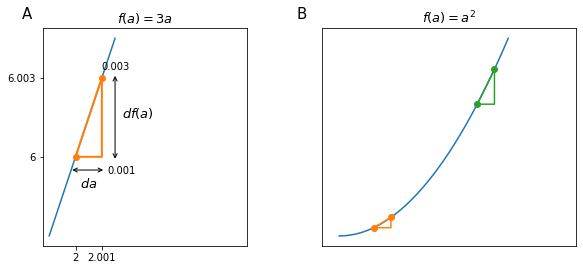

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax, ax2 = axes
xmax = 5
x = np.linspace(0, xmax)
y = 3*x
ax.plot(x, y)
ax.set_aspect('equal')
ax.set_xlim(-xmax*.1, xmax*3)
ax.plot([2, 4, 4, 2], [6, 12, 6, 6], marker='o', lw=2, markevery=[0, 1])

ax.set_xticks([2, 4])
ax.set_xticklabels([2, 2.001])
ax.set_yticks([6, 12])
ax.set_yticklabels([6, 6.003])
ax.set_xlabel('')
ax.annotate('0.001', (1.6, 5), xytext=(4.4, 5), va='center',  arrowprops={'arrowstyle': '<->'})
ax.annotate('0.003', (5, 5.7), xytext=(5, 12.6), ha='center',  arrowprops={'arrowstyle': '<->'});
ax.text(5.5, 9, '$df(a)$', fontsize=13)
ax.text(3, 4.5, '$da$', va='top', ha='center', fontsize=13)
ax.set_title('$f(a)=3a$', fontsize=13)
ax.text(-0.1, 1.1, 'A', transform=ax.transAxes,
  fontsize=15, va='top')

ax2.plot(x, x**2)
ax2.set_xlim(-xmax*.1, xmax*1.4)

x1, x2 = 10, 15
dx = np.r_[x[[x1, x2]], x[x2], x[x1]]
dy = np.r_[x[[x1, x2]], x[x1], x[x1]]**2
ax2.plot(dx, dy, marker='o', markevery=[0, 1])

x1, x2 = 40, 45
dx = np.r_[x[[x1, x2]], x[x2], x[x1]]
dy = np.r_[x[[x1, x2]], x[x1], x[x1]]**2
ax2.plot(dx, dy, marker='o', markevery=[0, 1])
ax2.set_title('$f(a)=a^2$', fontsize=13)
ax2.set_xticks([])
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes,
  fontsize=15, va='top');

<i id="fig:derivative">The concept of derivative applied to a straight line (A), where the derivative is constant along the whole length of the function; and to a non-linear function (B), where the derivative changes based on the value of $a$.</i>

## Computational graph
The computational graph explains the forward- and backward- propagation (as to say the flow of the computation) that takes place in the training of a neural network. 

To illustrate the computation graph let's use a simpler example than a full blown neural network, let's say that we are writing a function $J(a, b, c) = 3(a+bc)$. In order to compute this function there are three steps: 

1. $u = bc$
2. $v = a + u$
3. $J=3v$

We can draw these steps in a computational graph

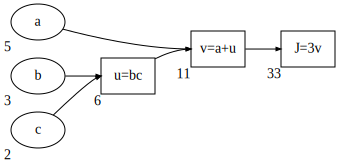

In [6]:
# Create Digraph object
dot = Digraph(edge_attr={'arrowsize': '0.5', 'headport':'w'})

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('a', xlabel='5', xlp='1,3')
    s.node('b', xlabel='3')
    s.node('c', xlabel='2')

with dot.subgraph() as s:
    s.node('u', label='u=bc', shape='rect', xlabel='6')
    s.node('v', label='v=a+u', shape='rect', xlabel='11')
    s.node('j', label='J=3v', shape='rect', xlabel='33')

# Add edge between 1 and 2
dot.edges(['bu', 'av', 'cu', 'uv', 'vj'])
dot.attr(rankdir='LR')
dot

Suppose we want to calculate $\frac{dJ}{dv}$ ( in other words if we change the value $v$ of a little amount how would the value of $J$ change?). 

* $J = 3v$
* $v = 11 \to 3.001$
* $J = 33 \to 33.003$

So 

$$\frac{dJ}{dv}=\frac{0.003}{0.001}=3$$

In the terminology of backpropagation if we want to compute $\frac{dJ}{dv}$ we take one step back from $J$ to $v$

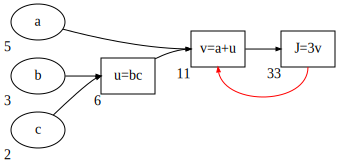

In [7]:
dot2 = cp(dot)
dot2.edge('j', 'v', headport='s', tailport='s', color='red')
dot2

We now want to calculate $\frac{dJ}{da}$, in other words the change of value $J$ when $a$ changes

* $a = 5 \to 5.001$
* $v = 11 \to 11.001$
* $J = 33 \to 33.003$

So, once again

$$\frac{dJ}{da}=\frac{0.003}{0.001}=3$$

Where the net change is given by 

$$
\frac{dJ}{da}=\frac{dJ}{dv}\frac{dv}{da}
$$


In calculus this is called the **chain rule** where $a$ affects $v$ that affects $J$ ($a\to v \to J$). So that the change of $J$ when $a$ is given by the product $\frac{dJ}{dv}\frac{dv}{da}$. This illustrates how having computed $\frac{dJ}{dv}$ helps in calculating $\frac{dJ}{da}$

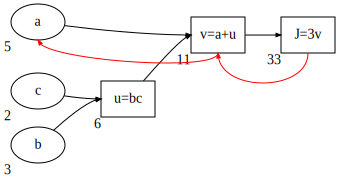

In [8]:
dot3 = cp(dot2)
dot3.edge('v', 'a', headport='s', tailport='s', color='red')
dot3